<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/tresindicadoresgpt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
import pandas as pd
import yfinance as yf
import numpy as np

data = yf.download("EURUSD=X",period="10y",interval="1d")

[*********************100%***********************]  1 of 1 completed


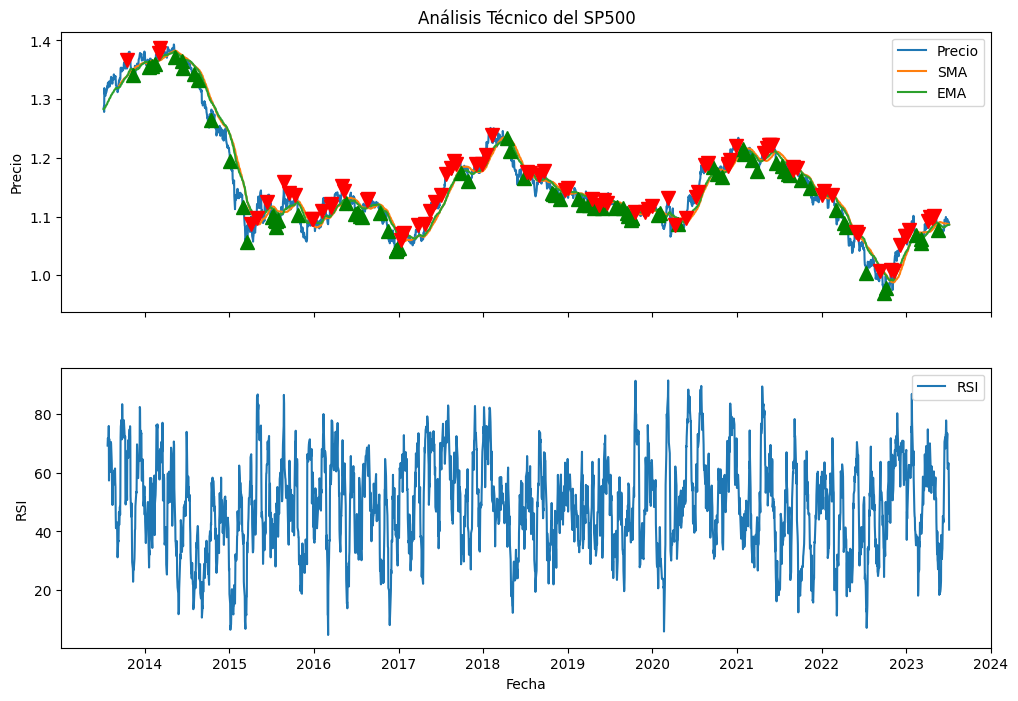

In [46]:
df=data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Calcular SMA de los últimos 50 períodos
df['SMA'] = df['Close'].rolling(window=50).mean()

# Calcular EMA de los últimos 50 períodos
df['EMA'] = df['Close'].ewm(span=50, adjust=False).mean()

# Calcular los cambios de precios
df['Change'] = df['Close'].diff()

# Calcular los cambios positivos y negativos
df['Gain'] = np.where(df['Change'] > 0, df['Change'], 0)
df['Loss'] = np.where(df['Change'] < 0, abs(df['Change']), 0)

# Calcular el promedio de los cambios positivos y negativos
df['AvgGain'] = df['Gain'].rolling(window=14).mean()
df['AvgLoss'] = df['Loss'].rolling(window=14).mean()

# Calcular el RSI
df['RS'] = df['AvgGain'] / df['AvgLoss']
df['RSI'] = 100 - (100 / (1 + df['RS']))

# Generar señales de compra y venta
df['Signal'] = 0

# Variable para realizar seguimiento de la señal previa
prev_signal = 0

# Condiciones para señal de compra
df.loc[(df['SMA'] > df['EMA']) & (df['RSI'] < 40), 'Signal'] = 1

# Condiciones para señal de venta
df.loc[(df['SMA'] < df['EMA']) & (df['RSI'] > 60), 'Signal'] = -1

# Eliminar señales consecutivas del mismo tipo
df.loc[df['Signal'].shift() == df['Signal'], 'Signal'] = 0

# Crear una figura y ejes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

# Graficar los precios, SMA y EMA
ax1.plot(df.index, df['Close'], label='Precio')
ax1.plot(df.index, df['SMA'], label='SMA')
ax1.plot(df.index, df['EMA'], label='EMA')
ax1.legend()

# Graficar las señales de compra y venta en el gráfico ax1
ax1.plot(df[df['Signal'] == 1].index, df[df['Signal'] == 1]['Close'], '^', markersize=10, color='g', label='Señal de compra')
ax1.plot(df[df['Signal'] == -1].index, df[df['Signal'] == -1]['Close'], 'v', markersize=10, color='r', label='Señal de venta')

# Configurar el título y etiquetas de los ejes
ax1.set_title('Análisis Técnico del SP500')
ax1.set_ylabel('Precio')

# Graficar el RSI en el gráfico ax2
ax2.plot(df.index, df['RSI'], label='RSI')
ax2.legend()

# Configurar el título y etiquetas de los ejes
ax2.set_ylabel('RSI')
ax2.set_xlabel('Fecha')

# Mostrar el gráfico
plt.show()


In [48]:
# Contar las señales de compra y venta
compras = df[df['Signal'] == 1].shape[0]
ventas = df[df['Signal'] == -1].shape[0]

# Imprimir los resultados
print("Número de señales de compra:", compras)
print("Número de señales de venta:", ventas)


Número de señales de compra: 84
Número de señales de venta: 83


In [51]:
# Filtrar las operaciones de compra y calcular las ganancias
compras_rentables = df[(df['Signal'] == 1) & (df['Close'].shift(-1) > df['Close'])].shape[0]

# Filtrar las operaciones de venta y calcular las ganancias
ventas_rentables = df[(df['Signal'] == -1) & (df['Close'].shift(-1) < df['Close'])].shape[0]

# Imprimir los resultados
print("Número de compras rentables:", compras_rentables)
print("Número de ventas rentables:", ventas_rentables)


Número de compras rentables: 39
Número de ventas rentables: 41


In [52]:
# Calcular el número total de operaciones de compra y venta
total_compras = df[df['Signal'] == 1].shape[0]
total_ventas = df[df['Signal'] == -1].shape[0]

# Calcular el porcentaje de acierto en compras y ventas
porcentaje_acierto_compras = (compras_rentables / total_compras) * 100
porcentaje_acierto_ventas = (ventas_rentables / total_ventas) * 100

# Imprimir los resultados
print("Porcentaje de acierto en compras:", porcentaje_acierto_compras)
print("Porcentaje de acierto en ventas:", porcentaje_acierto_ventas)


Porcentaje de acierto en compras: 46.42857142857143
Porcentaje de acierto en ventas: 49.39759036144578


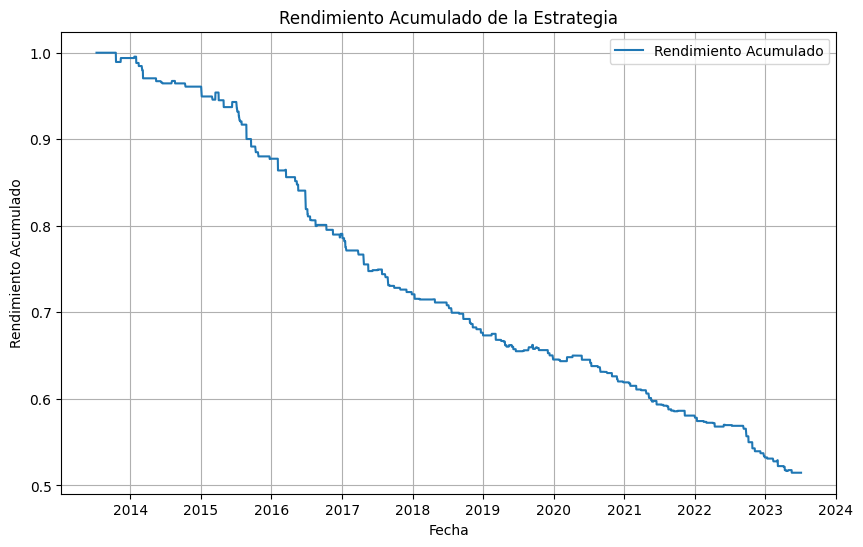

In [55]:
import matplotlib.pyplot as plt

# Calcular los rendimientos diarios
df['Rendimientos'] = df['Close'].pct_change()

# Calcular el rendimiento acumulado
df['Rendimiento_Acumulado'] = (1 + df['Rendimientos'] * df['Signal']).cumprod()

# Graficar el rendimiento acumulado
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rendimiento_Acumulado'], label='Rendimiento Acumulado')
plt.title('Rendimiento Acumulado de la Estrategia')
plt.xlabel('Fecha')
plt.ylabel('Rendimiento Acumulado')
plt.legend()
plt.grid(True)
plt.show()
